## Import Libraries

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Our Goal: to predict the price given a set of attributes.

## Load the Data

In [3]:
# from sklearn import datasets
boston = pd.read_csv('df_boston.csv')

In [4]:
X_boston = boston[['CRIM', 'ZN', 'INDUS','CHAS', 'NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]
y_boston = boston['Price']

In [5]:
print('Shape of data:', X_boston.shape, y_boston.shape)

Shape of data: (506, 13) (506,)


In [6]:
print('Keys:', boston.keys())
# print('Feature names:',boston.feature_names)

Keys: Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


In [7]:
boston.Price

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [8]:
# print(boston.DESCR)
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA (Exploratory Data Analysis)

## Q1: Create a dataframe and Save that dataset inside it.

In [9]:
boston = pd.read_csv('df_boston.csv')

## Q2: Print the head rows of the dataframe.

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Q3: Use histogram to show the distribution of House Prices.

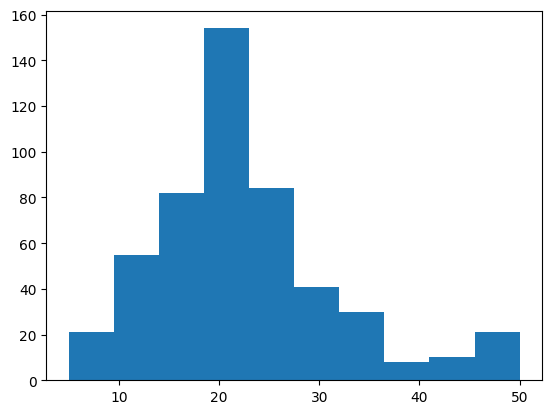

In [11]:
plt.hist(data= boston, x='Price');

## Q4: Use a heatmap to show the correlation between features and the target labels.

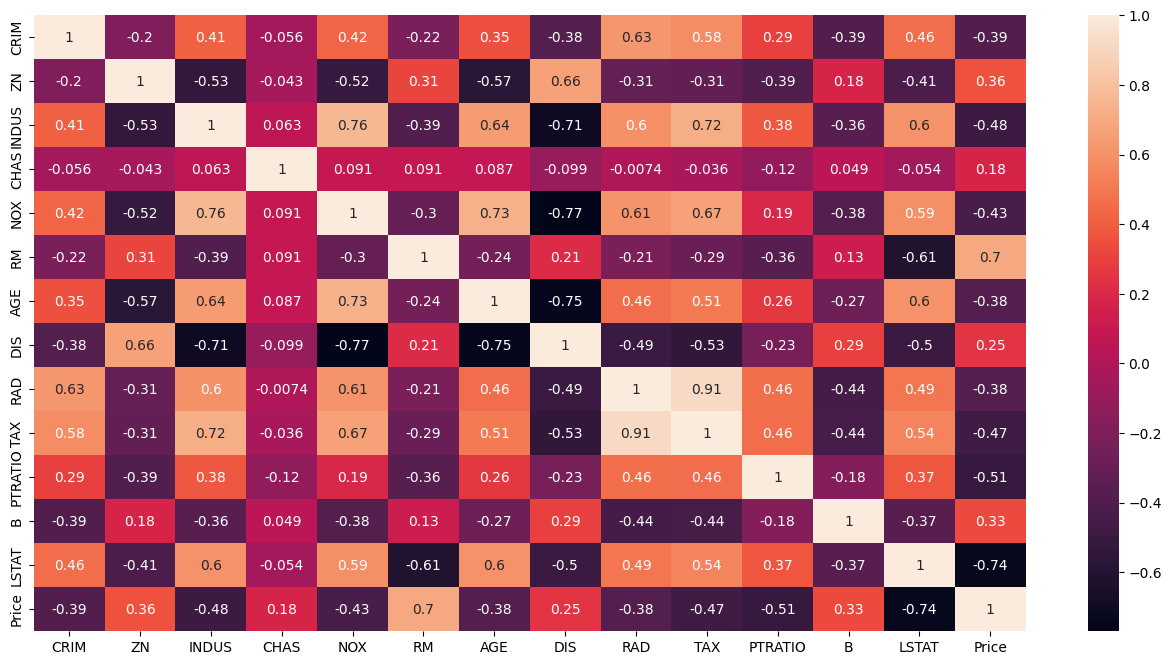

In [12]:
boston.corr()
plt.figure(figsize=(16,8))
sns.heatmap(boston.corr(), annot=True);


## Q5: Use a lmplot to draw the relations between price and LSTAT.

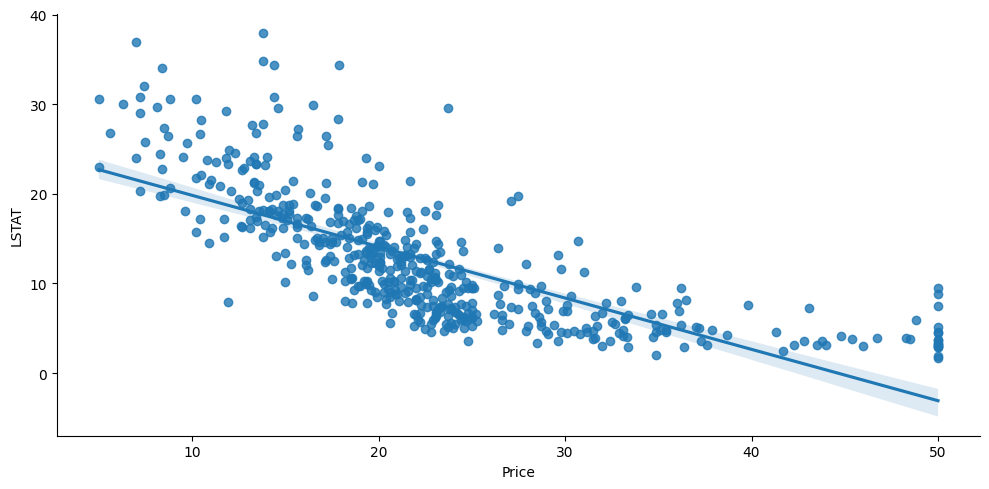

In [13]:
sns.lmplot(data=boston, x='Price', y='LSTAT', aspect=2);

## Q6: Use a lmplot to draw the relations between price and RM.

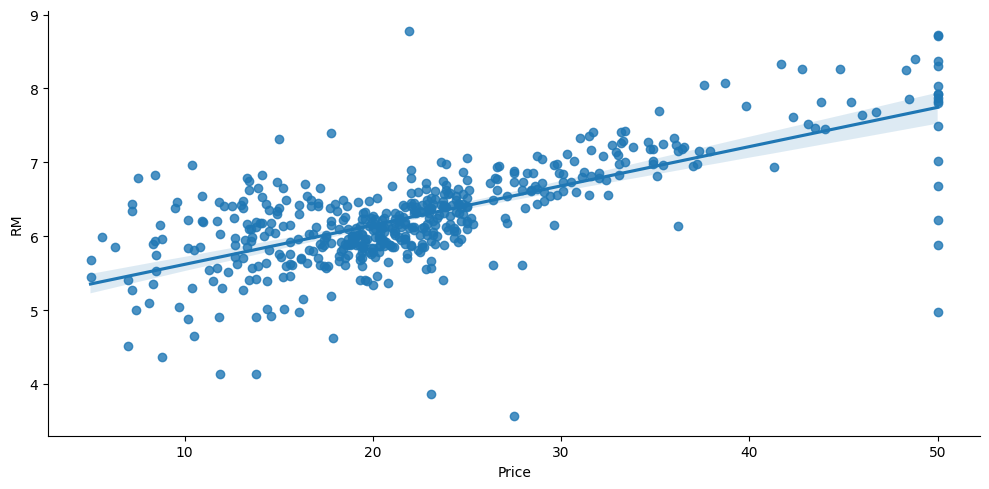

In [14]:
sns.lmplot(data=boston, x='Price', y='RM', aspect=2);

In [15]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

## Q7: Split the dataset into Train and Test sets with test_size=30% and random_state=23.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.3, random_state=23)

## Q8: Build a Linear Regression Model.

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

## Q9: Train the Model.

In [20]:
lm.fit(X_train, y_train)

LinearRegression()

## Q10: Evaluate the model. 
- print intercept and coefficients.
- compare between predictions and real values, then visualize them.
- Draw Residual Histogram.

In [21]:
print('Intercept: ',lm.intercept_)

Intercept:  27.789606703251074


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X_boston.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.093418
ZN,0.043303
INDUS,-0.022522
CHAS,3.342047
NOX,-16.330196
RM,4.271930
AGE,0.000721
DIS,-1.403231
RAD,0.255429
TAX,-0.007482


In [23]:
predictions = lm.predict(X_test)
predictions

array([25.48882634, 26.85383326, 26.50113697, 16.8311552 , 38.90548232,
       15.92640789, 19.23152198, 29.28806615, 33.79428877, 38.25894258,
       16.19079976, 27.79685578, 25.35181876, 25.61234607, 21.35214307,
       19.1221877 , 31.34939126, 31.18316962, 29.08034579, 28.90724661,
       19.59636559, 17.90783181, 24.98877865, 24.00154542, 13.56628155,
       22.08791583, 32.99232593, 28.36965015, 29.65108026, 39.94060342,
       18.66689308, 14.92285788, 19.6923896 , 19.20029267, 20.14718966,
       37.91700834, 24.21072339, 30.86942899, 13.24009483, 36.42525089,
        8.97985188, 13.88836303, 11.78208526, 19.61208754, 36.32061974,
       20.01573887, 11.5591671 , 21.66102362, 13.54102458, 39.34825195,
       22.51984897,  2.71613802, 17.75797283, 18.44448789, 24.04115464,
       32.92544769,  5.97982079, 21.7327963 , 17.46853879, 22.60218768,
       17.64957037, 21.74406196, 21.65178897, 43.91766166, 30.82382874,
       29.34034013, 21.19730767, 16.86447485, 31.17198257, 13.38

In [24]:
Real_Values = np.array(y_test)
Real_Values

array([23.2, 22.1, 20.6, 17.8, 41.7, 17.2, 20.5, 31.2, 32. , 37.6, 13.3,
       24.5, 19.4, 23.8, 21. , 15.6, 37. , 23.6, 23.6, 22.8, 19.9, 23.2,
       24.6, 23.4, 17.2, 26.4, 37.2, 24.4, 25. , 21.9, 12.7, 14.1, 27.5,
       18.8, 27.9, 48.3, 25. , 32.5, 13.5, 36. , 17.8, 11.3, 15.6, 18.2,
       50. , 20. , 13.1, 19.3, 10.5, 43.5, 20.6,  8.8, 18.1, 14.2, 19.2,
       27.5,  7.4, 19.3, 22.5, 21.4, 19.6, 20.7, 24.1, 50. , 25.1, 24.1,
       13.1,  8.5, 24.8, 11. , 17.7, 13.8, 19.8, 16.1, 17.3, 13.3, 10.4,
       19.4, 12.3, 27.9, 23.1, 18.5, 30.1, 16.3, 25. , 19. , 33.2, 50. ,
       24.3, 13.4, 20.2, 18.3, 16.7, 18.5, 21.9, 14. , 50. , 18.6, 22. ,
       23.8, 13.9, 19.8, 29.4, 50. , 16. , 20.4, 29.8, 24.7, 13.3, 12.1,
       23. , 12.5, 30.7, 22.2, 29.6, 24.8, 12.7, 19.6, 21.6, 21.7, 22.5,
       19.9, 18.4, 27.5, 23.1, 15. , 18.4, 18.8, 22. ,  7.2, 24.6, 20.9,
       17.9, 19.7, 16.1, 20.8, 23.8, 16.6, 21.7, 50. , 15.6, 29.9, 33.3,
       10.5, 16.5, 31.7, 34.7, 28.1, 13.8,  8.7, 35

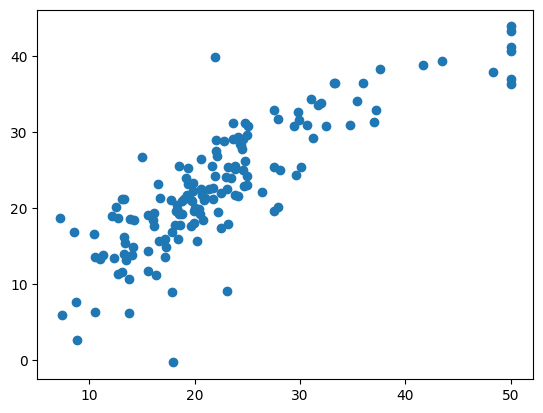

In [25]:
plt.scatter(Real_Values,predictions);

## Residual Histogram

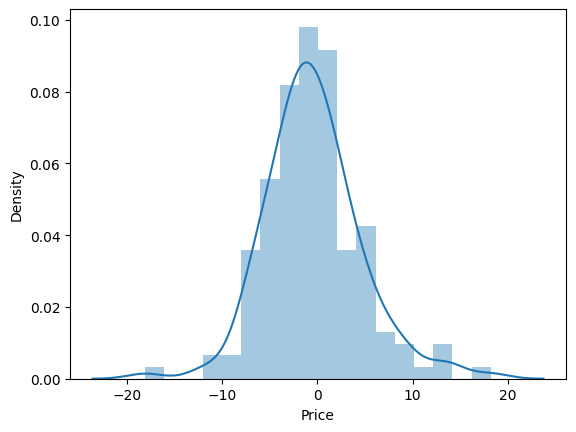

In [26]:
sns.distplot((y_test-predictions));

## Q11: Use evaluation metrics MAE, MSE, RMSE and R^2.

In [27]:
from sklearn import metrics

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.782429511205032
MSE: 25.35857719400701
RMSE: 5.035730055712579


In [29]:
print('R^2: ', metrics.r2_score(y_test,predictions)) 

R^2:  0.6947991644651345
